# First Names Homework

## Loading and preparing the data

First we need to download the dataset

In [1]:
file = "dpt2019_txt.zip"
if(!file.exists(file)){
  download.file("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip",
	destfile=file)
}
unzip(file)

Then we build the file from the dataframe

In [2]:
library(tidyverse)
library(ggplot2)
FirstNames <- read_delim("dpt2019.csv",delim=";");

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  sexe = col_double(),
  preusuel = col_character(),
  annais = col_double(),
  dpt = col_character(),
  nombre = col_double()
)

Warning message:
“36445 parsing failures.
  row    col expected actual          file
10781 annais a double   XXXX 'dpt2019.csv'
10782 annais a double   XXXX 'dpt2019.csv'
10783 annais a doubl

Now that we have the dataset we need to explore it to have an idea about the data it contains

In [3]:
nrow(FirstNames)
names(FirstNames)
str(FirstNames)

[1] 3676682

[1] "sexe"     "preusuel" "annais"   "dpt"      "nombre"

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	3676682 obs. of  5 variables:
 $ sexe    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ preusuel: chr  "_PRENOMS_RARES" "_PRENOMS_RARES" "_PRENOMS_RARES" "_PRENOMS_RARES" ...
 $ annais  : num  1900 1900 1900 1900 1900 1900 1900 1900 1900 1900 ...
 $ dpt     : chr  "02" "04" "05" "06" ...
 $ nombre  : num  7 9 8 23 9 4 6 3 11 7 ...
 - attr(*, "problems")=Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	36445 obs. of  5 variables:
  ..$ row     : int  10781 10782 10783 10784 10787 10789 10790 12190 12191 12193 ...
  ..$ col     : chr  "annais" "annais" "annais" "annais" ...
  ..$ expected: chr  "a double" "a double" "a double" "a double" ...
  ..$ actual  : chr  "XXXX" "XXXX" "XXXX" "XXXX" ...
  ..$ file    : chr  "'dpt2019.csv'" "'dpt2019.csv'" "'dpt2019.csv'" "'dpt2019.csv'" ...
 - attr(*, "spec")=
  .. cols(
  ..   sexe = col_double(),
  ..   preusuel = col_character(),
  ..   annais = col_double(),
  ..   dpt = col_character(),
  ..   nombre = col

In [4]:
dim(FirstNames)
length(FirstNames)
summary(FirstNames)

[1] 3676682       5

[1] 5

      sexe         preusuel             annais          dpt           
 Min.   :1.000   Length:3676682     Min.   :1900    Length:3676682    
 1st Qu.:1.000   Class :character   1st Qu.:1948    Class :character  
 Median :2.000   Mode  :character   Median :1980    Mode  :character  
 Mean   :1.536                      Mean   :1973                      
 3rd Qu.:2.000                      3rd Qu.:2002                      
 Max.   :2.000                      Max.   :2019                      
                                    NA's   :36445                     
     nombre       
 Min.   :   3.00  
 1st Qu.:   4.00  
 Median :   7.00  
 Mean   :  23.36  
 3rd Qu.:  19.00  
 Max.   :6316.00  
                  

Since the data has some parsing failures, we will need to clean it. The problematic rows are:

In [5]:
nrow(problems(FirstNames))
tail(problems(FirstNames))

[1] 36445

row,col,expected,actual,file
<int>,<chr>,<chr>,<chr>,<chr>
3676661,annais,a double,XXXX,'dpt2019.csv'
3676664,annais,a double,XXXX,'dpt2019.csv'
3676671,annais,a double,XXXX,'dpt2019.csv'
3676679,annais,a double,XXXX,'dpt2019.csv'
3676681,annais,a double,XXXX,'dpt2019.csv'
3676682,annais,a double,XXXX,'dpt2019.csv'


It appears that most of the problems are linked to some missing data on the annais colomn. We will check that by combining the similar problems by colomn and actual value

In [6]:
unique(select(problems(FirstNames), col, actual))

col,actual
<chr>,<chr>
annais,XXXX


Let's remove the lines that contain a wrong year data.

In [7]:
nrow(FirstNames)
FirstNames <- subset(FirstNames, annais!="XXXX")
nrow(FirstNames)

[1] 3676682

[1] 3640237

Now we can start the analysis of the data.

## First Name frequency

Let's analyse the frequency of some _traditional_ name like "Michel"

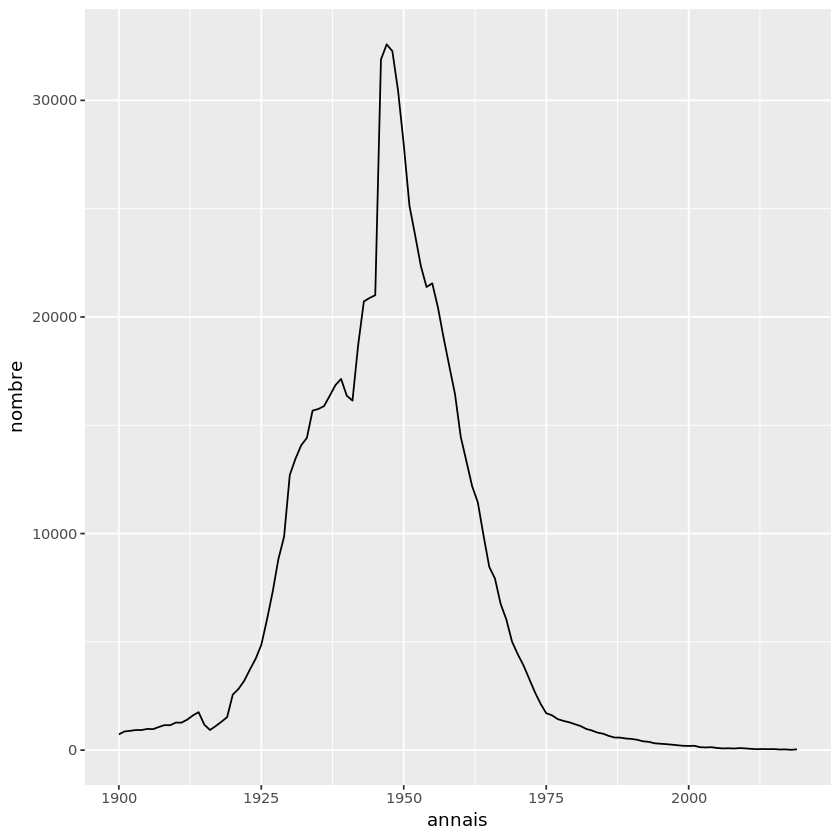

In [8]:
library(dplyr)
Michel <- FirstNames %>% filter(preusuel=="MICHEL") %>%
        select(annais,nombre) %>%
        group_by(annais) %>%
        summarise(nombre = sum(nombre))

ggplot(data=Michel, aes(x=annais, y=nombre)) + geom_line()

And also analyse some more _modern_ name like "Lina"

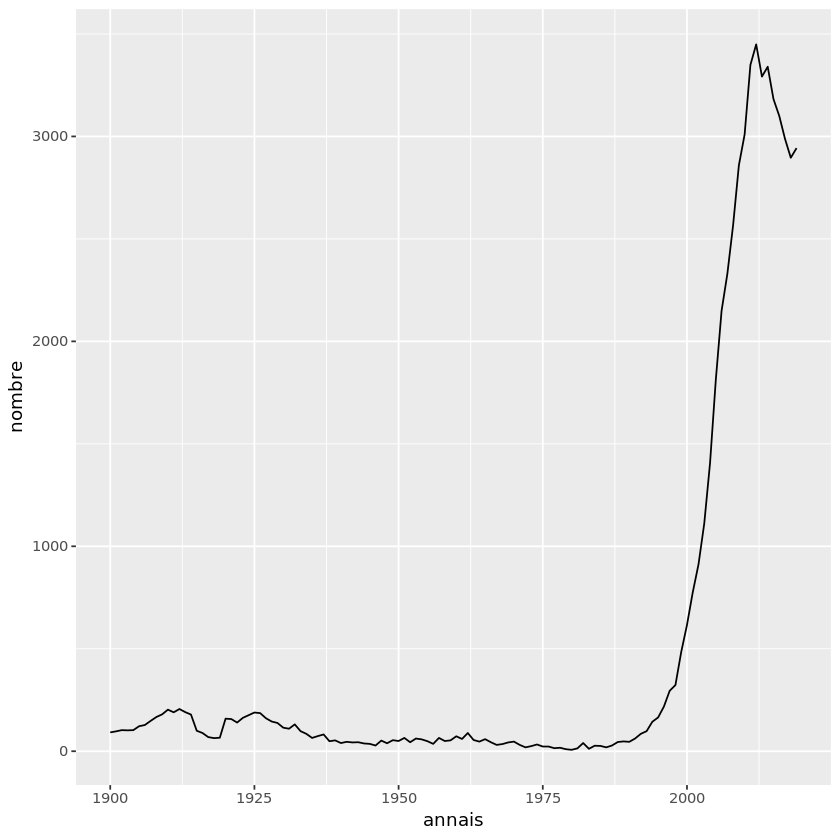

In [9]:
library(dplyr)
Lina <-  FirstNames %>% filter(preusuel=="LINA") %>%
        select(annais,nombre) %>%
        group_by(annais) %>%
        summarise(nombre = sum(nombre))

ggplot(data=Lina, aes(x=annais, y=nombre)) + geom_line()

Now we compare the usage of those two First Names with the number of rare first names overtime.

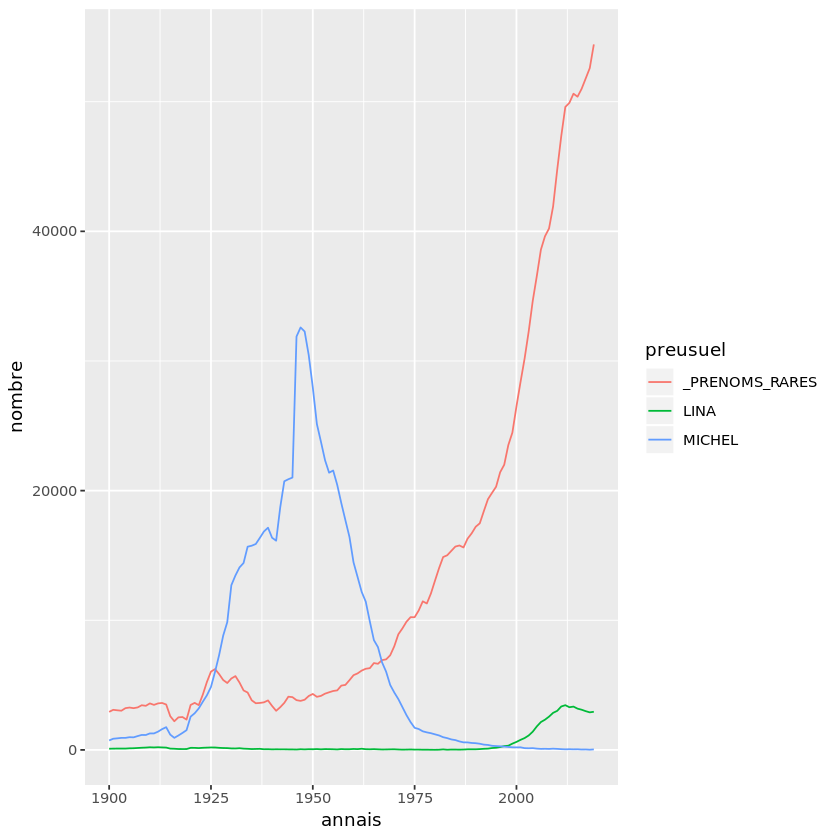

In [10]:
Comparison <- FirstNames %>%
              filter(preusuel == "MICHEL" | preusuel == "LINA" | preusuel == "_PRENOMS_RARES") %>%
              group_by(annais, preusuel) %>%
              summarise(nombre = sum(nombre))

ggplot(data = Comparison,aes(x=annais, y=nombre, color = preusuel)) + geom_line() 

So a quick analysis of the data shows that while _traditional_ names are slowly getting forgotten, the _rare and unique names_ are getting more and more common in France.

## Popular First Names by gender

Let's get the most popular first name for the female gender for every year.

In [11]:
FemaleNames = FirstNames %>%
              filter(sexe==2) %>%
              select(preusuel, annais, nombre) %>%
              group_by(preusuel, annais) %>%
              summarise(nombre = sum(nombre)) %>%
              group_by(annais) %>%
              top_n(1, nombre)

tail(FemaleNames)

preusuel,annais,nombre
<chr>,<dbl>,<dbl>
STÉPHANIE,1976,16698
STÉPHANIE,1977,15053
SYLVIE,1961,19190
SYLVIE,1962,20824
SYLVIE,1963,25669
SYLVIE,1964,27555


And now do the same thing for the male gender.

In [12]:
MaleNames = FirstNames %>%
            filter(sexe==1) %>%
            select(preusuel, annais, nombre) %>%
            group_by(preusuel, annais) %>%
            summarise(nombre = sum(nombre)) %>%
            group_by(annais) %>%
            top_n(1, nombre)

tail(MaleNames)

preusuel,annais,nombre
<chr>,<dbl>,<dbl>
SÉBASTIEN,1977,19467
SÉBASTIEN,1978,19101
SÉBASTIEN,1979,17502
STÉPHANE,1971,23326
STÉPHANE,1974,18512
THIERRY,1965,24541


Now let's get the most popular male and female first name.

In [13]:
select(top_n(summarise(group_by(FemaleNames, preusuel), nombre=sum(nombre)), 1, nombre), preusuel)
select(top_n(summarise(group_by(MaleNames, preusuel), nombre=sum(nombre)), 1, nombre), preusuel)

preusuel
<chr>
MARIE


preusuel
<chr>
JEAN


Now since we got that "Jean" and "Marie" are the most popular first names for each gender throughour the years, let's draw their frequency graph.

the first one for "Marie"

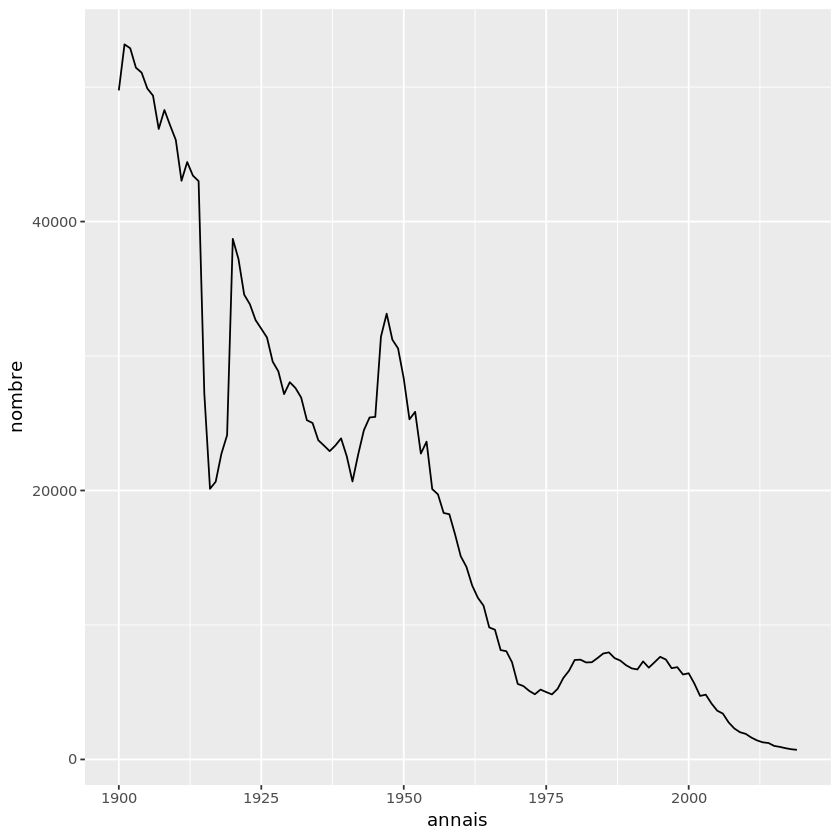

In [14]:
library(dplyr)
Marie <- FirstNames %>% filter(preusuel=="MARIE") %>%
        select(annais,nombre) %>%
        group_by(annais) %>%
        summarise(nombre = sum(nombre))

ggplot(data=Marie, aes(x=annais, y=nombre)) + geom_line()

The second one for "Jean"

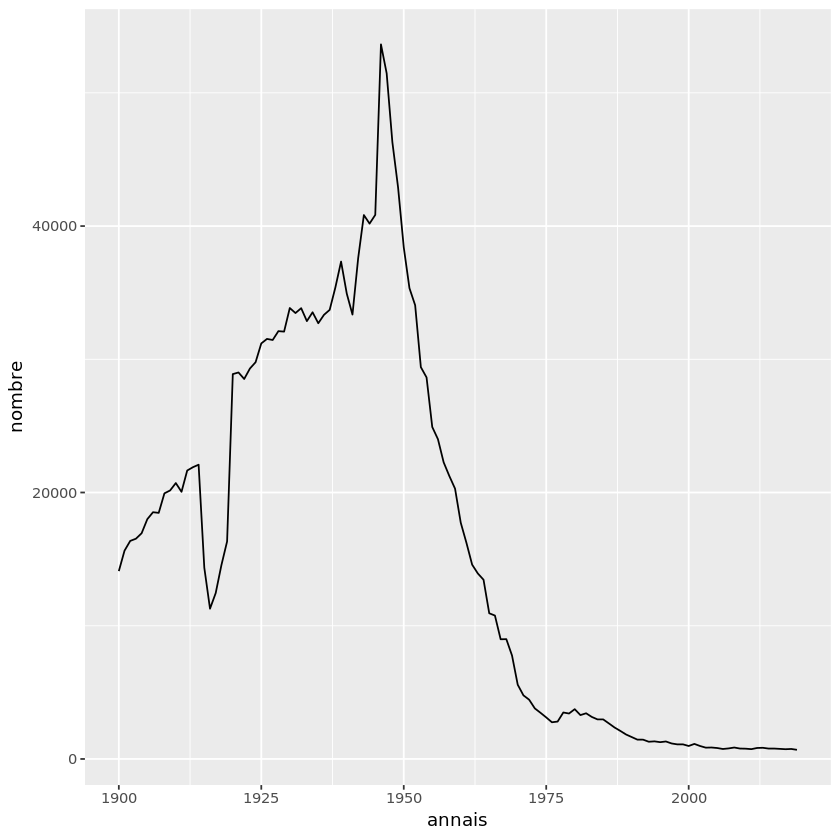

In [15]:
library(dplyr)
Jean <- FirstNames %>% filter(preusuel=="JEAN") %>%
        select(annais,nombre) %>%
        group_by(annais) %>%
        summarise(nombre = sum(nombre))

ggplot(data=Jean, aes(x=annais, y=nombre)) + geom_line()

We can conclude from both graphs, altought these two names were the most popular throughout the years in France, they are quickly and drastically fading out of fashion.